<a href="https://colab.research.google.com/github/manjulamishra/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/manjula_LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=33.8930211809825, pvalue=4.367409988652586e-08)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.
from scipy import stats
help(binom)

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

### Get the data from
http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29#

In [0]:

# Getting started with drug data
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2018-12-04 20:44:41--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  18.9MB/s    in 2.2s    

2018-12-04 20:44:43 (18.9 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [0]:
#unzip the file
3!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [0]:
#.tsv can be imported as pd.read_table
import pandas as pd
df = pd.read_table('drugsComTrain_raw.tsv')
df.head(30)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,"August 9, 2016",11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1


In [0]:
df.shape 

(161297, 7)

In [0]:
#subset of the df where 
df_Topiramate = df.loc[df['drugName'] == 'Topiramate'] #column drugName == to this med

In [0]:
df_Topiramate.shape #check the shape od this df

(606, 7)

In [0]:
df_Topiramate.head() #first five rows

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
10,29607,Topiramate,Migraine Prevention,"""I have been on this medication almost two wee...",9.0,"January 1, 2015",19
404,29709,Topiramate,ibromyalgia,"""I didn&#039;t like Topamax. I became very par...",1.0,"August 10, 2011",42
1133,29193,Topiramate,Migraine Prevention,"""I have been taking 75mg topamax one a day for...",9.0,"November 15, 2016",42
2107,29682,Topiramate,Obesity,"""Topamax is amazing. I originally took it 6 ye...",9.0,"February 24, 2012",314
2965,29702,Topiramate,Obesity,"""Definitely takes away my hunger.""",10.0,"September 12, 2011",175


### I didn't continue with Topiramate. I want to pick four brands of birth control pills and see how they are rated

In [0]:
#brand 1
df_Lybrel	= df.loc[df['drugName'] == 'Lybrel'] #get all the Lybrel from column drugName

In [0]:
#assign the rating column into a new variable
birth_control_l = df_Lybrel['rating']

In [0]:
#brand 2
df_Nexplanon	= df.loc[df['drugName'] == 'Nexplanon'] #get all the Nexplanon from column drugName

In [0]:
birth_control_n = df_Nexplanon['rating'] #assign the rating column into a new variable

In [0]:
#brand 3
df_Etonogestrel	= df.loc[df['drugName'] == 'Etonogestrel']#get all the Etonogestrel from column drugName

In [0]:
birth_control_e = df_Etonogestrel['rating'] #assign the rating column into a new variable

In [0]:
#Brand 4
df_Ethinyl = df.loc[df['drugName'] == 'Ethinyl estradiol / levonorgestrel']#get all the Ethinyl estradiol from column drugName

In [0]:
y = df_Ethinyl['rating']#assign the rating column into a new variable

In [0]:
df_Ethinyl.shape #Just checking the shape 

(1888, 7)

In [0]:
df_Ethinyl.isna().sum()

Unnamed: 0      0
drugName        0
condition      79
review          0
rating          0
date            0
usefulCount     0
dtype: int64

In [0]:
#Another med ofr ADHD which I didn't use
df_Guanfacine  = df.loc[df['drugName'] == 'Guanfacine']

In [0]:
df_Guanfacine.shape

(127, 7)

In [0]:
z = df_Guanfacine['rating']

In [0]:
z.shape

(127,)

#Generate and numerically represent a confidence interval
We learned this in teh class

In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval {:.2}, {:.2}".format(
      confidence_interval[1], confidence_interval[2])
  return s

In [0]:

confidence_interval_Topiramate = confidence_interval(x, confidence=0.95)
print(confidence_interval_Topiramate)

(6.632013201320132, 6.369457264416656, 6.894569138223607)


In [0]:
report_confidence_interval(confidence_interval_Topiramate)

'our mean lies in the interval 6.4, 6.9'

In [0]:
confidence_interval_Guanfacine = confidence_interval(z, confidence=0.95)
print(confidence_interval_Guanfacine)
report_confidence_interval(confidence_interval_Guanfacine)

(5.9763779527559056, 5.372317073711144, 6.5804388318006675)


'our mean lies in the interval 5.4, 6.6'

##finding confidence interval (CI) for different Birth Control pills

#### Pill 1. Ethinyl

In [0]:
confidence_interval_Ethinyl = confidence_interval(y, confidence=0.95)
print(confidence_interval_Ethinyl)
report_confidence_interval(confidence_interval_Ethinyl)

(5.799258474576271, 5.651051793863935, 5.947465155288606)


'our mean lies in the interval 5.7, 5.9'

#### Standard error (Mean - lower bound)

In [0]:
strr1 = 5.799258474576271 - 5.651051793863935
print(strr1)

0.14820668071233545


#### Pill 2. Etonogestrel

In [0]:
confidence_interval_birth_control_e = confidence_interval(birth_control_e, confidence=0.95)
print(confidence_interval_birth_control_e)
report_confidence_interval(confidence_interval_birth_control_e)

(5.802458033573141, 5.689871099831397, 5.915044967314886)


'our mean lies in the interval 5.7, 5.9'

####SE (mean - lower bound)

In [0]:
strr2 = 5.802458033573141 - 5.689871099831397
print(strr2)

0.11258693374174467


#### Pill 3. Nexplanon

In [0]:
confidence_interval_birth_control_n = confidence_interval(birth_control_n, confidence=0.95)
print(confidence_interval_birth_control_n)
report_confidence_interval(confidence_interval_birth_control_n)

(5.6730055658627085, 5.532388438116763, 5.813622693608654)


'our mean lies in the interval 5.5, 5.8'

####SE (mean - lower bound)

In [0]:
strr3 = 5.6730055658627085 - 5.532388438116763
print(strr3)

0.14061712774594515


#### Pill 4. Nexplanon

In [0]:
confidence_interval_birth_control_l = confidence_interval(birth_control_l, confidence=0.95)
print(confidence_interval_birth_control_l)
report_confidence_interval(confidence_interval_birth_control_l)

(7.6, 5.5157577337154, 9.684242266284599)


'our mean lies in the interval 5.5, 9.7'

####SE (mean - lower bound)

In [0]:
strr4 = 7.6 - 5.5157577337154
print(strr4)

2.0842422662845994


### Making list of all four SE

In [0]:
Strr_all = [strr, strr1, strr2, strr3, strr4]
print(Strr_all)

[0.14820668071233545, 0.14820668071233545, 0.11258693374174467, 0.14061712774594515, 2.0842422662845994]


##Plotting the error for the four meds at 95% CI 

Populating the interactive namespace from numpy and matplotlib


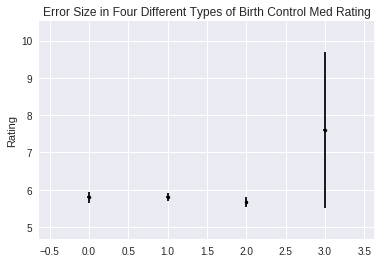

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
#The actual code
#plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')

plt.errorbar([0,1,2,3], [5.799258474576271, 5.802458033573141, 
                         5.6730055658627085, 7.6 ], xerr = 0.02,
              yerr=[0.14820668071233545, 0.11258693374174467, 
                               0.14061712774594515, 2.0842422662845994], 
             linestyle='', fmt='.k')
plt.margins(0.2)
#ylim(0,10)
plt.title('Error Size in Four Different Types of Birth Control Med Rating')

#plt.xticks(x, labels, rotation='vertical')
#plt.xlabel('Ethinyl','Etonogestre', 'Nexplanon')
plt.ylabel('Rating')

plt.show();

####Ref [Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html)

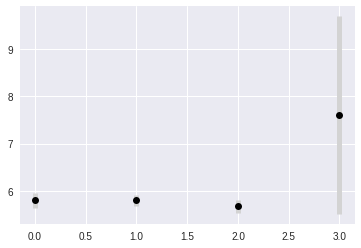

In [0]:
plt.errorbar([0,1,2,3], [5.799258474576271, 5.802458033573141, 
                         5.6730055658627085, 7.6 ],
              yerr=[0.14820668071233545, 0.11258693374174467, 
                               0.14061712774594515, 2.0842422662845994], fmt='o', color='black',
             ecolor='lightgray', elinewidth=5, capsize=0);

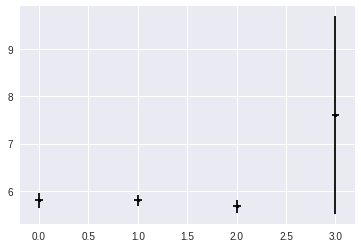

In [0]:
plt.errorbar([0,1,2,3], [5.799258474576271, 5.802458033573141, 
                         5.6730055658627085, 7.6 ], xerr = 0.04,
              yerr=[0.14820668071233545, 0.11258693374174467, 
                               0.14061712774594515, 2.0842422662845994], fmt='.k');

#Interpretation of Confidence Level

if we sample same number number of people again and run the experiment, there is 95% likelihood that the mean rating for these birth control medicines will be between the lower bound and the upper bound. 

a 95% confidence interval covers 95% of the normal curve -- the probability of observing a value outside of this area is less than 0.05. ... A 95% confidence interval for the standard normal distribution, then, is the interval (-1.96, 1.96), since 95% of the area under the curve falls within this interval.